# Intro to Scientific Computing

${\bf Problem \,Set\, 2}$

**NAMES: ** Rajdipa Chowdhury

**DATE: ** 10/18/17



In [84]:
# Import numpy
from numpy import *
# Import matplotlib.pyplot
from matplotlib.pyplot import *
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt 

# Evaluate this cell to define some constants (cgs units) 
AU = 1.49597870e+13  # cm 
MSun = 1.98911e+33   # g 
Mearth = 5.99219e+27 # g
Rearth = 6.371e+8    # cm
SecInDay = 86400.
SecInYear = SecInDay*365.25
kB=1.3807e-16       # erg / K 
Lsun=3.839e+33      # erg/s
sigmaB = 5.6704e-5  # erg / cm^2 / s / K^4 

## Finding planet 9

### Planet 9 in the news! 
Last year there was a big science news with a remarkable connection to UCSC. 
UCSC alumnus Konstantin Batygin (now a Professor at Caltech) and his colleague Mike Brown are suggesting that a 10-Earth mass planet is lurking at the outer fringes of the solar system. 

Here's the story as reported in the New York Times:
http://www.nytimes.com/2016/01/21/science/space/ninth-planet-solar-system-beyond-pluto.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=second-column-region&region=top-news&WT.nav=top-news&_r=0

Here it is in Scientific American: 
http://www.scientificamerican.com/article/strong-evidence-suggests-a-super-earth-lies-beyond-pluto1/

### For more information:

If you're interested to learn more, you can can read about the potential planet 9 on the study author's own website
http://www.findplanetnine.com/

and here's the link to the free version of the original paper, which recieved a remarkable 243547 downloads in its first weekend online:
http://arxiv.org/abs/1601.05438


## 1) The orbit of planet 9

For this problem, we'll look in more detail at the orbit of planet 9 relative to the rest of the solar system.  

The presence of this potential planet is predicted based on its gravitational influence. As a result, we still don't quite know it's orbit. (That's why we need to find it after all!). But we do have some constraints
- the orbital pericenter (the point of closest separation) is about 200 AU
- the orbital semi-major axis is between 500AU and 1200AU: Let's assume it's 800AU for this problem.

### a) orbital eccentricity
For an orbital semi-major axis, $a=800$AU, and a pericenter distance $r_{\rm p} = 200$AU, what is the orbital eccentricity?
The relationship between eccentricity and orbital shape is given by

$r_{\rm p} = a (1-e)$

by the way the furthest distance or "apocenter" is 

$r_{\rm a} = a (1+e)$

In [85]:
a = 800. #unit is AU,and this is the orbital semi major axix 
r_p = 200. #unit is in AU and this is the pericenter eccentricity
e = (a - r_p) / a
r_a = a*(1 + e)
print "the orbital eccentricity is " , e
print "the apocenter is " , r_a

the orbital eccentricity is  0.75
the apocenter is  1400.0


In [86]:
# =================================
# Elliptical orbit around the sun.

# The true anomaly of the orbit is the angle between the direction of pericenter
# (closest separation) and the current position of the orbiting body

Image('/Users/abatta/Downloads/true-anomaly.png')

### b) orbital distance

The gravitational two-body problem, tells us that planets follow elliptical (sometimes almost circular) orbits around the Sun, which is located at one of the focus of the ellipse traced by the orbiting planet. It can be shown that the distance $r$ between the Sun and the planet can be described as a function of the ellipse's semi-major axis $a$, and the true anomaly $f$ (named $\nu$ in the figure above), which is the angle between the direction of the pericenter (closest separation) and the current position of the orbiting body. 

If $a$ is the semi-major axis, and $e$ is the eccentricity, we have,
$$
r=\frac{a(1-e^2)}{(1+e\cos f)}.
$$


In the solar system, the sun sits at the focus of the ellipse. 
- Define a function: `planet_r` that computes $r(f,a,e)$. 
- Create an array $f$ that ranges from 0 to $2\pi$, 
- and finally plot the distance from planet 9 to the sun as a function of this angle, $f$. 
- Label your plot's axes.
- Do the pericenter and apocenter correspond to a particular value for $f$? Which one?

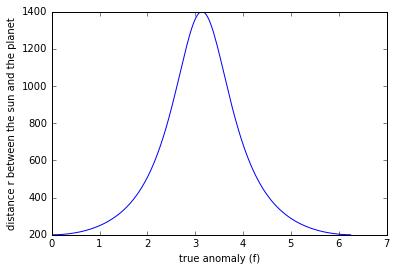

In [87]:
def planet_r(f,a,e):
    return ((a*(1-e**2)) / (1+(e * cos(f))))

f = arange(0,2*pi,.01*pi)  #f is in radians 
r = planet_r(f,800,.75)


plot(f,r) #plot of the distance from planet w.r.t f
xlabel('true anomaly (f)')
ylabel('distance r between the sun and the planet')




### c) orbit

Now, transform your orbital angle and distance to cartesian coordinates using 

$x=r \cos(f)$,  $y=r \sin(f)$

- Make new $x$, $y$ arrays (in units of AU) for planet 9 and plot its 2D position in the plane of the solar system. 

- Use your distance function to add neptune to your plot: a circular orbit ($e=0$) with semi-major axis of 30.069 AU. 

- Use your distance function to add jupyter to your plot: an orbit with eccentricity ($e=0.048$) and a pericenter distance of 4.950 AU. 

- Use the command `axis('equal')` to make sure your plot is equal aspect ratio. 

- Add the sun at the origin (0,0) with a yellow dot (Try searching how to do this online).

- Add a legend to your plot (Try searching how to do this online).

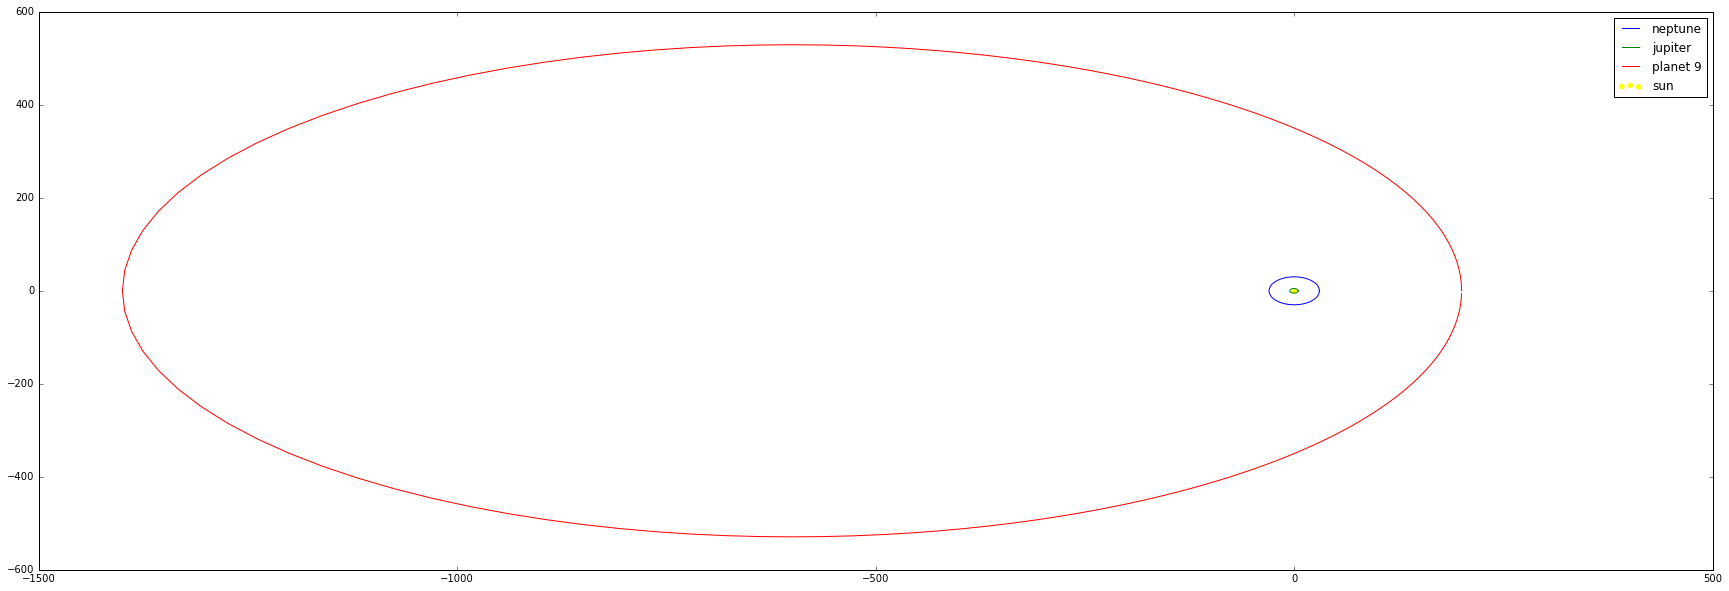

In [88]:
r_1 = planet_r(f,30.069,.0) #for neptune
r_2 = planet_r(f,4.950,0.048) #for jupiter 
x = r*cos(f)   # x coordinate for planet 9
y = r*sin(f)   #y coordinate for planet 9
x_1 = r_1*cos(f)   # x coordinate for neptune
y_1 = r_1*sin(f)   #y coordinate for neptune
x_2 = r_2*cos(f)   # x coordinate for jupiter 
y_2 = r_2*sin(f)   #y coordinate for jupiter 

plt.figure(figsize=(30,10))
plot (x_1,y_1,label='neptune') #plot for neptune
plot (x_2,y_2,label='jupiter') #plot for jupiter
plot (x,y,label='planet 9')     #plot for planet 9
plt.scatter(0,0,marker='o', color='yellow',label='sun') #plotting the sun as an yellow dot
plt.legend()

#axis('equal')


## 2) Equilibrium temperature of planet 9

#### From Wikipedia, https://en.wikipedia.org/wiki/Planetary_equilibrium_temperature

To calculate the equilibrium temperature, we assume that the power absorbed by the planet, which is a distance $D$ from the star, is equal to the power emitted by the planet:
$$
{ P }_{ in }={ P }_{ out }
$$
 
The power input to the planet is equal to the luminosity (''i.e.'' power emitted) of the star, times the ratio absorbed by the planet (1 minus the albedo), times the area of the planet illuminated by the star, divided by the area of the sphere that all of the star's radiation is cast on at the distance of the planet:
$$
{ P }_{ in }={ L }_{ \bigodot  }\left( 1-albedo \right) \left( \frac { \pi { { R }_{ p } }^{ 2 } }{ 4\pi { D }^{ 2 } }  \right)
$$

Any incoming power to a black body is radiated as heat according to the Stefan–Boltzmann law
$$
P=\sigma A { T }^{ 4 }
$$

The power emitted by the planet:
$$
{ P }_{ out }=\left( \sigma { { T }_{ eq } }^{ 4 } \right) \left( 4\pi { { R }_{ p } }^{ 2 } \right)
$$

Setting these equal:

$$
{ T }_{ eq }={\left( { \frac { { L }_{ \bigodot  } \left( 1-albedo \right) }{ 16 \sigma \pi { D }^{ 2 } } }\right)}^{ 1/4 } 
$$

#### Questions:
- Define a function and use it to compute the equilibrium temperature of planet 9 at a distance of 800AU. Be careful with units: use cgs units for all constants, and convert any distances which may have been in AU above to cm. Assume an albedo of 0.3.

- Make a figure which plots the equilibrium temperature of planet 9 as a function of angle, $f$ in its orbit. Again, be sure to label your axes.

- Add neptune and jupyter to your plot again. Add a legend. (Note: If you use the legend option `loc='best'` it will avoid your lines). 

In [89]:
def temperature(D):
    albedo = 0.3
    D1 = D * AU
    return (((Lsun*(1 - albedo))/(16.0*kB*pi*(D1**2)))**(.25))
temperature(800)  #computing 
    

7210.726852394146

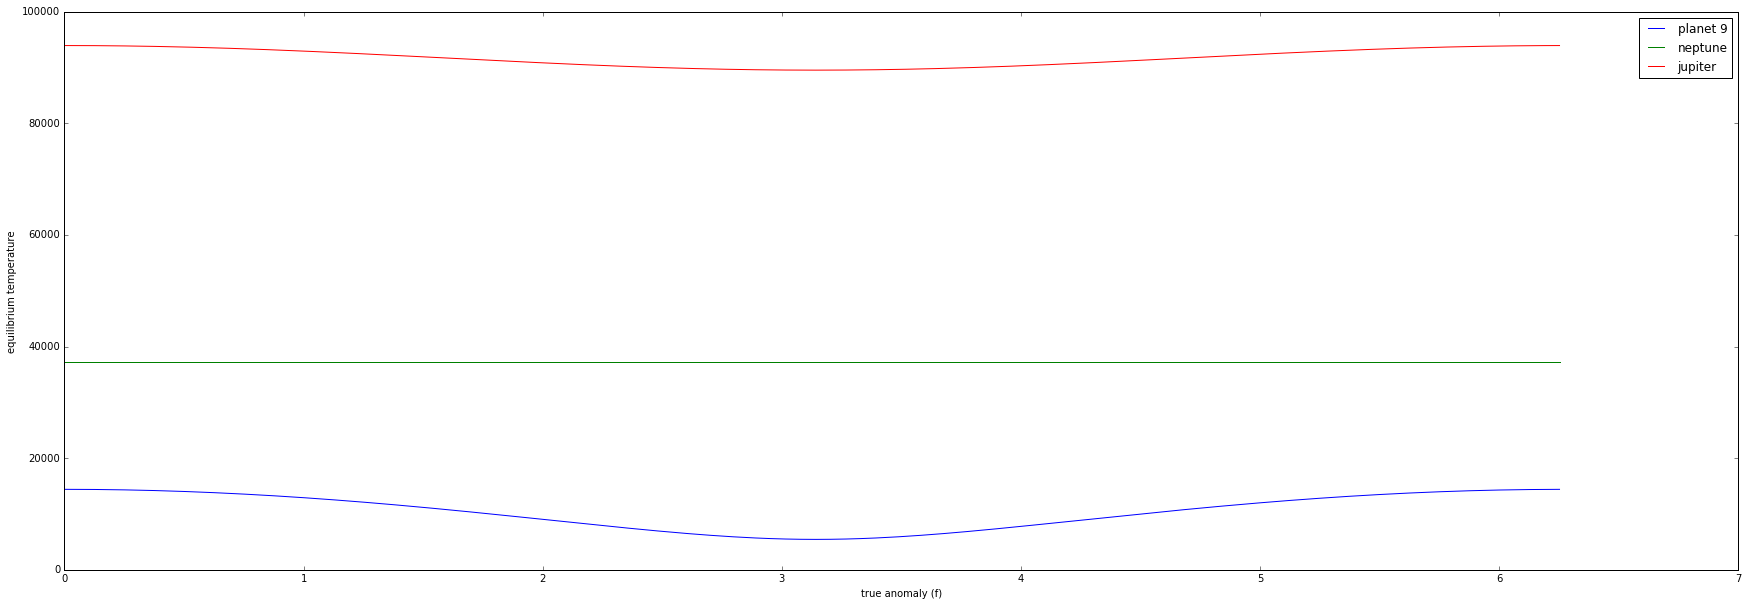

In [90]:
t = temperature(r)
u = temperature(r_1)
v = temperature(r_2)

plt.figure(figsize=(30,10))
xlabel('true anomaly (f)')
ylabel('equilibrium temperature')
plot (f,t,label='planet 9')
plot (f,u,label='neptune')
plot (f,v,label='jupiter')
plt.legend(loc='best')